In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('data/HR_data.csv')
data.head()

,Unnamed: 0,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
print(f"data shape: {data.shape}")

data shape: (312, 67)


In [8]:
data.info() # Detailed information on features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HR_TD_Mean           312 non-null    float64
 1   HR_TD_Median         312 non-null    float64
 2   HR_TD_std            312 non-null    float64
 3   HR_TD_Min            312 non-null    float64
 4   HR_TD_Max            312 non-null    float64
 5   HR_TD_AUC            312 non-null    float64
 6   HR_TD_Kurtosis       312 non-null    float64
 7   HR_TD_Skew           312 non-null    float64
 8   HR_TD_Slope_min      312 non-null    float64
 9   HR_TD_Slope_max      312 non-null    float64
 10  HR_TD_Slope_mean     312 non-null    float64
 11  HR_TD_Slope          312 non-null    float64
 12  TEMP_TD_Mean         312 non-null    float64
 13  TEMP_TD_Median       312 non-null    float64
 14  TEMP_TD_std          312 non-null    float64
 15  TEMP_TD_Min          312 non-null    flo

In [47]:
# nominal features are object and 'individual' and 'puzzler'
nominal_cols = data.select_dtypes(include=['object']).columns.tolist()
nominal_cols.extend(['Individual', 'Puzzler'])
# ordinal features are float64 from col 51 until the end
ordinal_cols = data.columns[51:].drop(labels=nominal_cols).tolist()
# numerical features are the not nominal or ordinal ones
numerical_cols = data.drop(columns=nominal_cols+ordinal_cols).columns.tolist()


In [48]:
# Check for missing values
# print vars that have missing values and their counts
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)


Missing values:
 EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64


In [49]:
data[numerical_cols].describe() # Summary statistics for numerical features

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,...,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,311.000000,311.000000
mean,78.549974,77.452869,6.545680,68.778365,92.451122,24307.558590,-0.054661,0.375978,-0.567952,0.518478,...,4644.033566,0.441970,-0.081832,-0.031247,0.026415,-0.000210,-0.000144,23.519231,1.998292,2.013928
std,11.382695,12.093798,4.998885,9.341107,17.759683,4035.278119,1.671170,0.823875,0.391239,0.470043,...,6578.125989,3.275766,0.991550,0.052295,0.039443,0.001625,0.001603,12.378527,0.463986,0.616643
min,57.606118,54.130000,0.834390,49.000000,67.200000,14853.260000,-1.644825,-2.230501,-3.366000,0.075000,...,-1119.978146,-1.716957,-5.620632,-0.270382,-0.000116,-0.009898,-0.009191,1.000000,1.250000,0.833333
25%,71.061238,69.971250,3.160342,62.192500,80.207500,21549.048750,-0.984473,-0.151022,-0.665208,0.292500,...,805.425505,-0.994082,-0.490413,-0.038426,0.002784,-0.000726,-0.000640,14.000000,1.687500,1.662500
50%,76.784284,75.600000,4.919862,67.565000,87.830000,23650.430000,-0.456978,0.361195,-0.457500,0.412500,...,2130.039346,-0.530050,0.097534,-0.006689,0.008455,-0.000119,-0.000078,21.000000,1.916667,1.931818
75%,83.566296,83.108750,8.006694,73.805000,99.452500,26543.927500,0.216412,0.988498,-0.317500,0.613750,...,6253.319971,0.691155,0.515195,-0.002713,0.030752,0.000097,0.000113,31.000000,2.184267,2.213384
max,151.942434,167.950000,32.155396,111.070000,172.470000,46069.990000,12.510032,3.225347,-0.112500,6.202500,...,49466.892503,33.739174,2.670028,-0.000058,0.242704,0.007656,0.007897,74.000000,5.406250,5.958333


In [51]:
data[ordinal_cols].describe() # Summary statistics for nominal features

,Frustrated,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
count,312.000000,312.000000,312.000000,312.000000,312.000000,310.000000,312.000000,311.000000,311.000000,311.000000,310.000000
mean,2.022436,1.346154,1.057692,2.192308,1.221154,2.183871,1.381410,2.784566,1.051447,2.553055,2.912903
std,1.986160,0.617576,0.271719,1.037034,0.549014,1.027958,0.577199,1.113793,0.273430,1.173463,1.104050
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,3.000000
75%,3.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,1.000000,3.000000,4.000000
max,8.000000,4.000000,3.000000,5.000000,4.000000,5.000000,3.000000,5.000000,4.000000,5.000000,5.000000


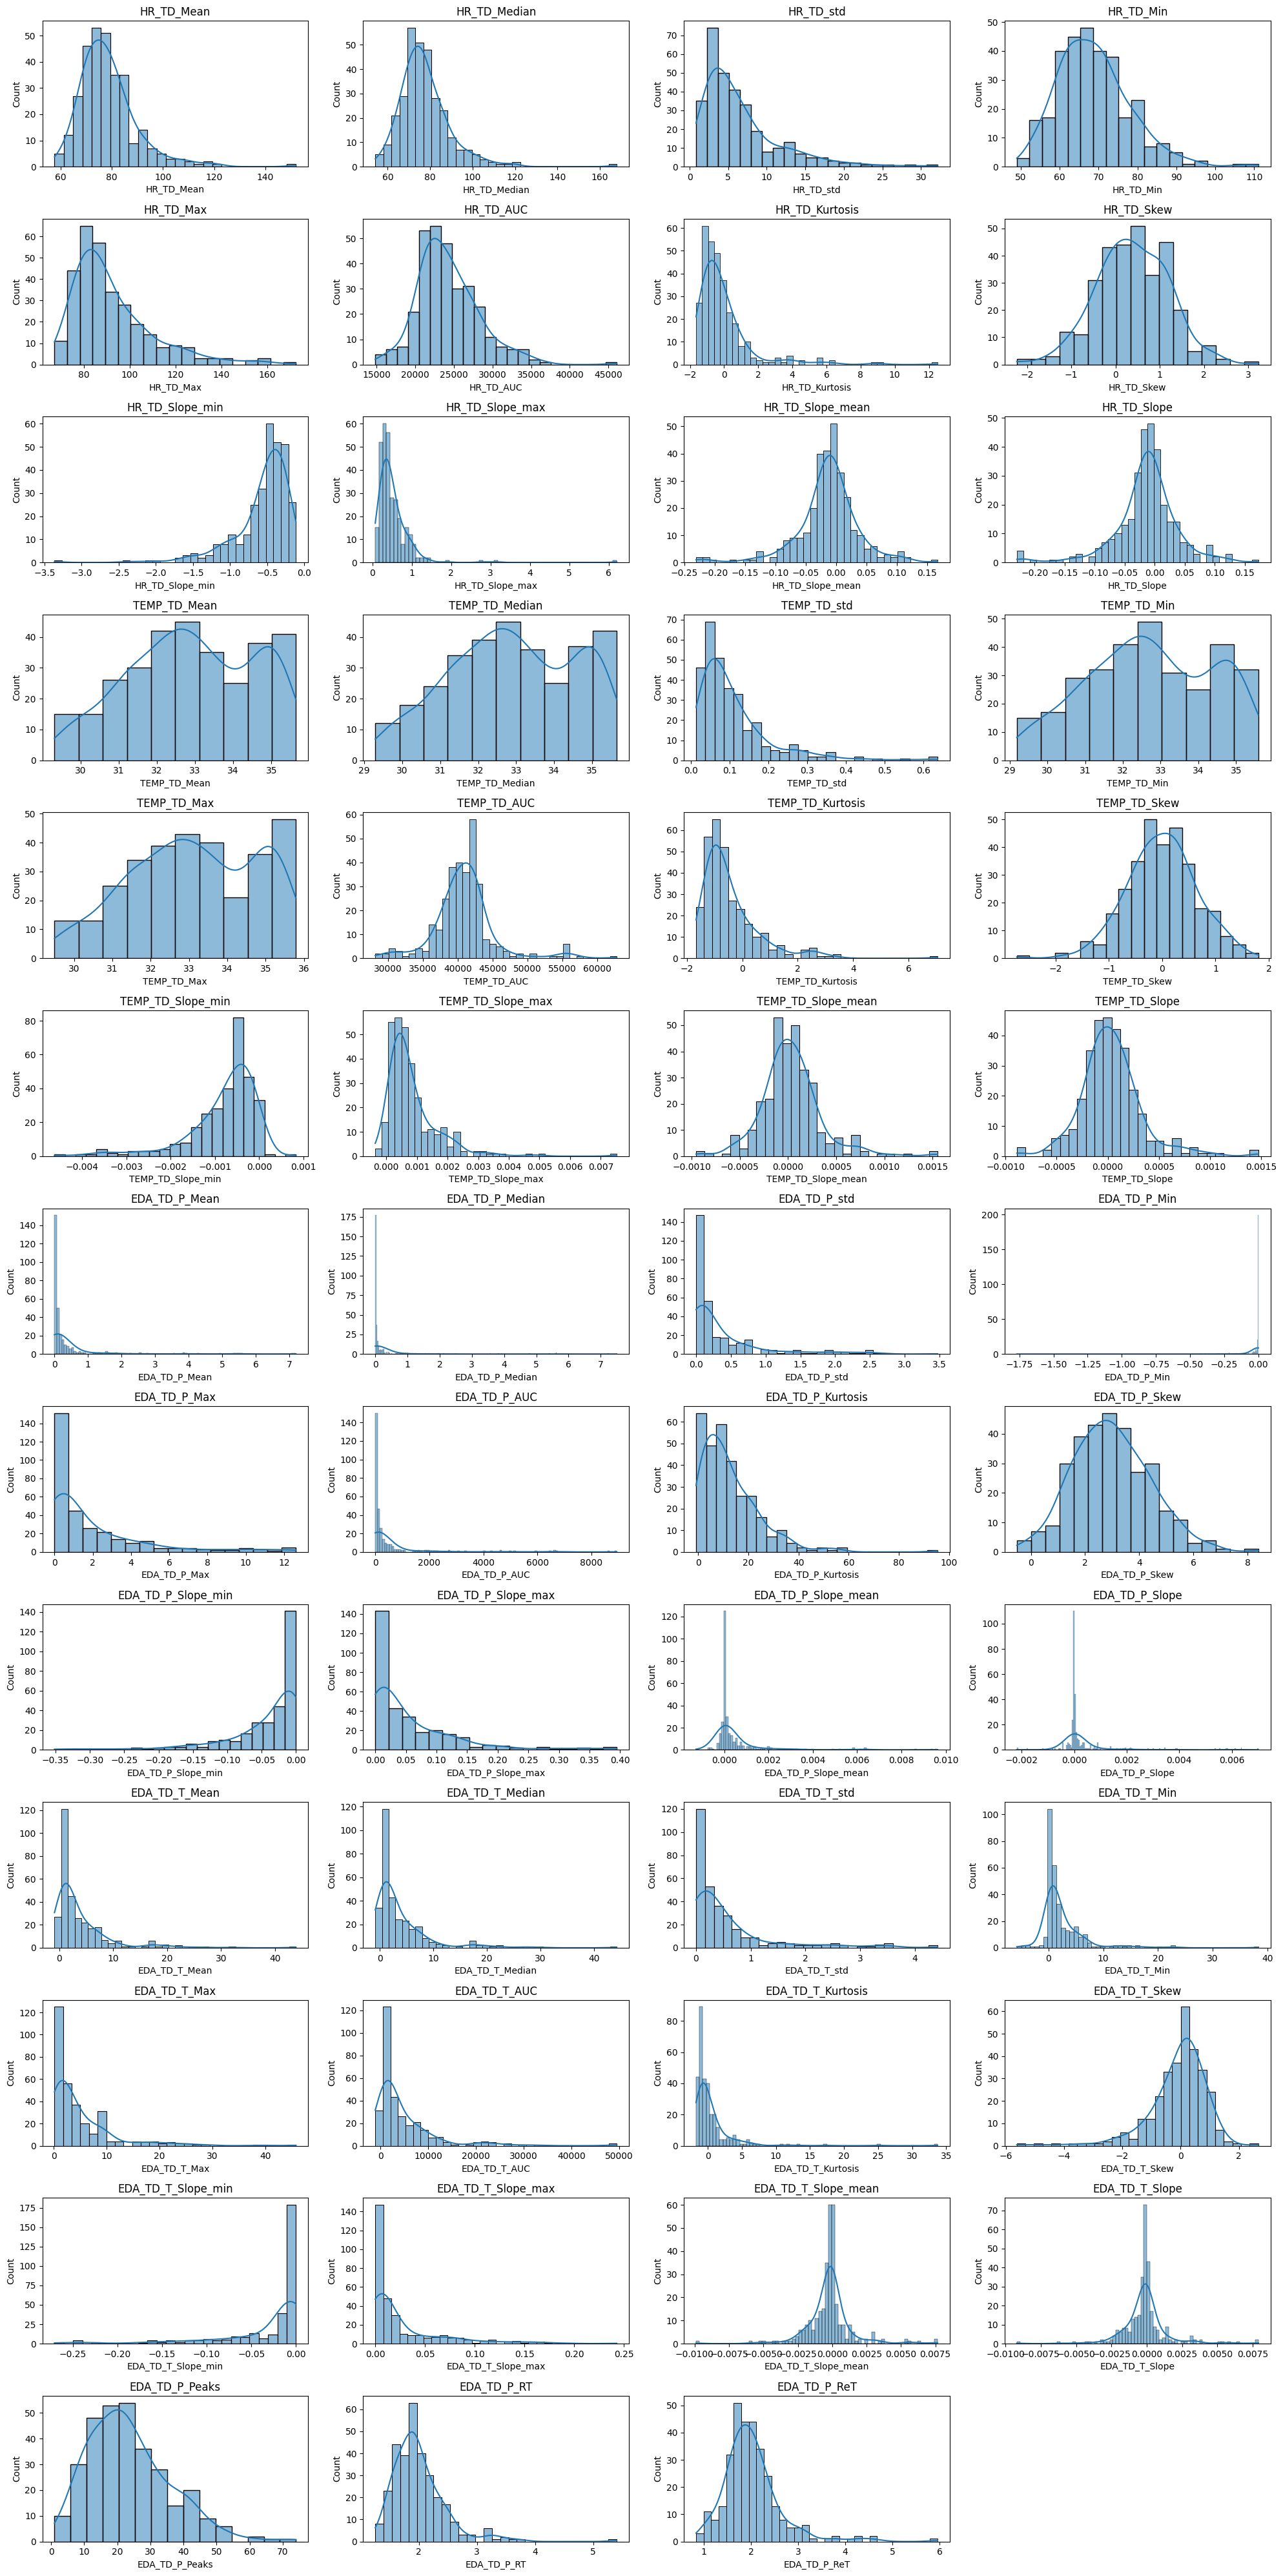

In [56]:
# plot distribution of each feature
plt.figure(figsize=(20, 40))
for i, col in enumerate(data[numerical_cols].columns):
    plt.subplot(13, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

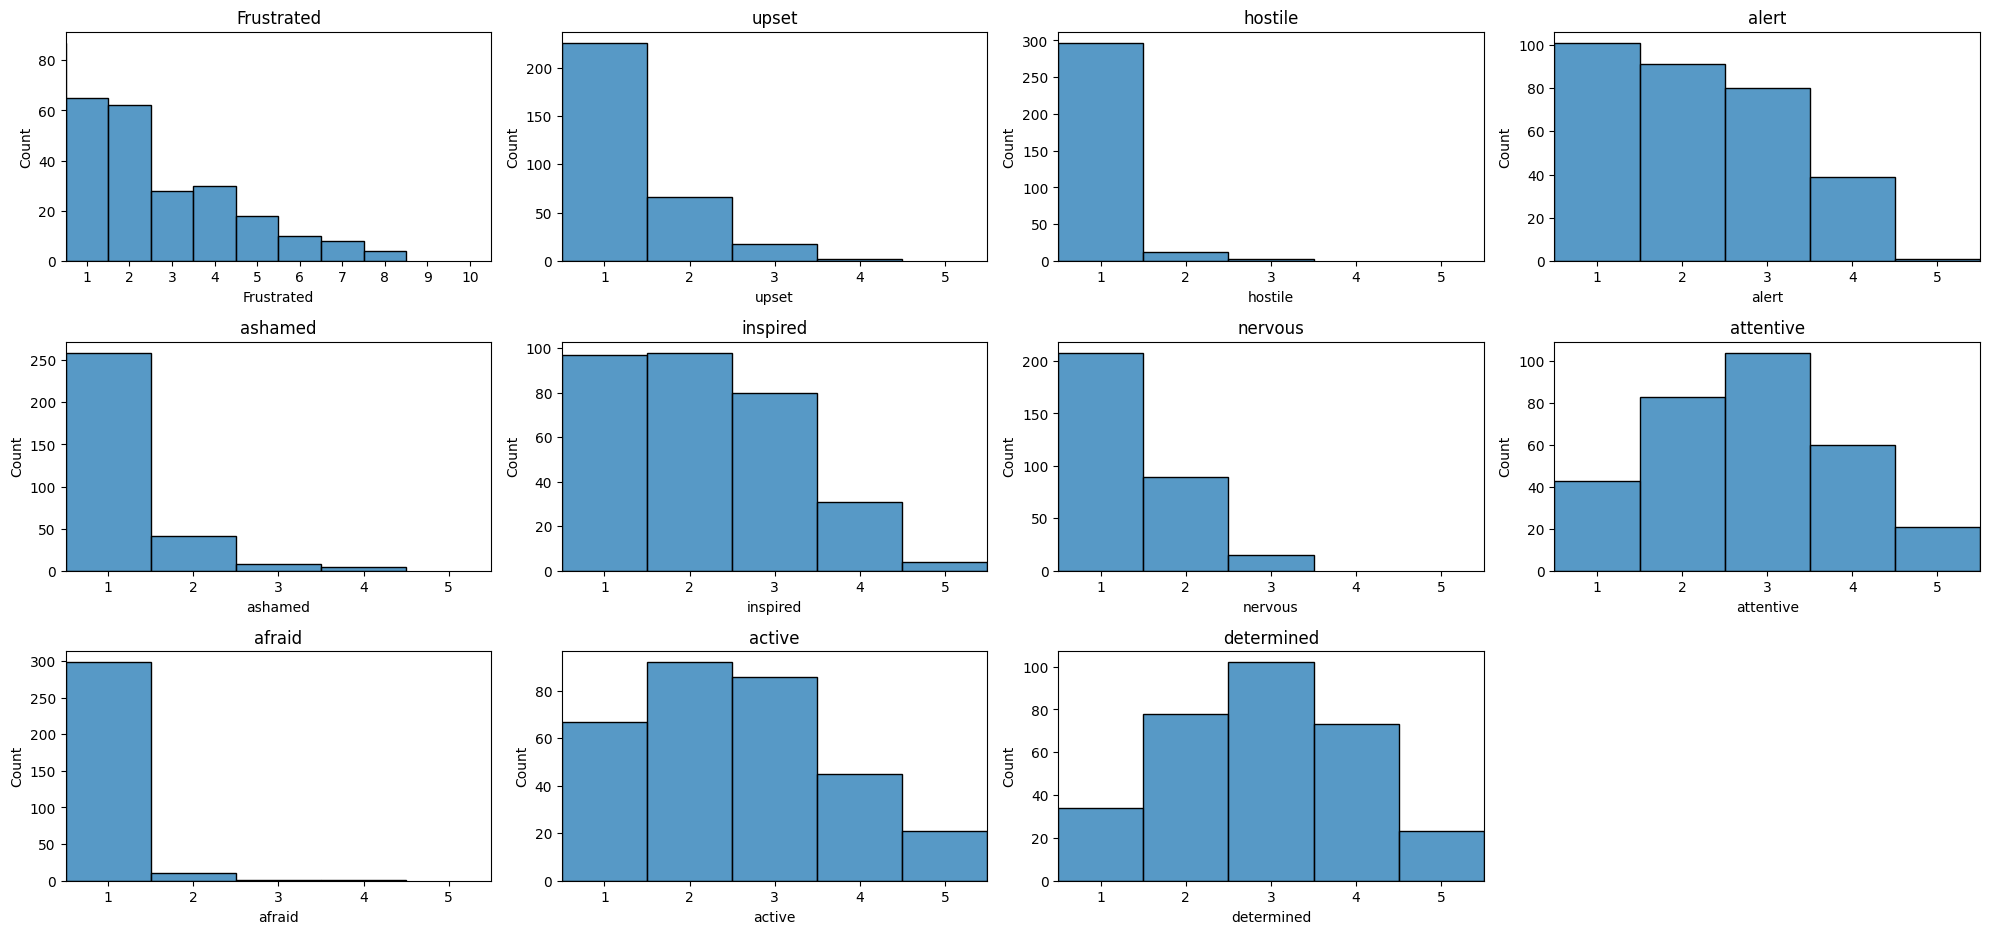

In [85]:
# plot distribution of each ordinal feature 
plt.figure(figsize=(20, 40))
for i, col in enumerate(data[ordinal_cols].columns):
    if col == 'Frustrated':
        plt.subplot(13, 4, i + 1)
        sns.histplot(data[col], bins=10, kde=False, discrete=True)
        plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        plt.xlim(0.5, 10.5)
    else:
        plt.subplot(13, 4, i + 1)
        sns.histplot(data[col], bins=5, kde=False, discrete=True)
        plt.xticks([1, 2, 3, 4, 5])
        plt.xlim(0.5, 5.5)
    plt.xlabel(col)
    plt.title(col)
plt.tight_layout()
plt.show()

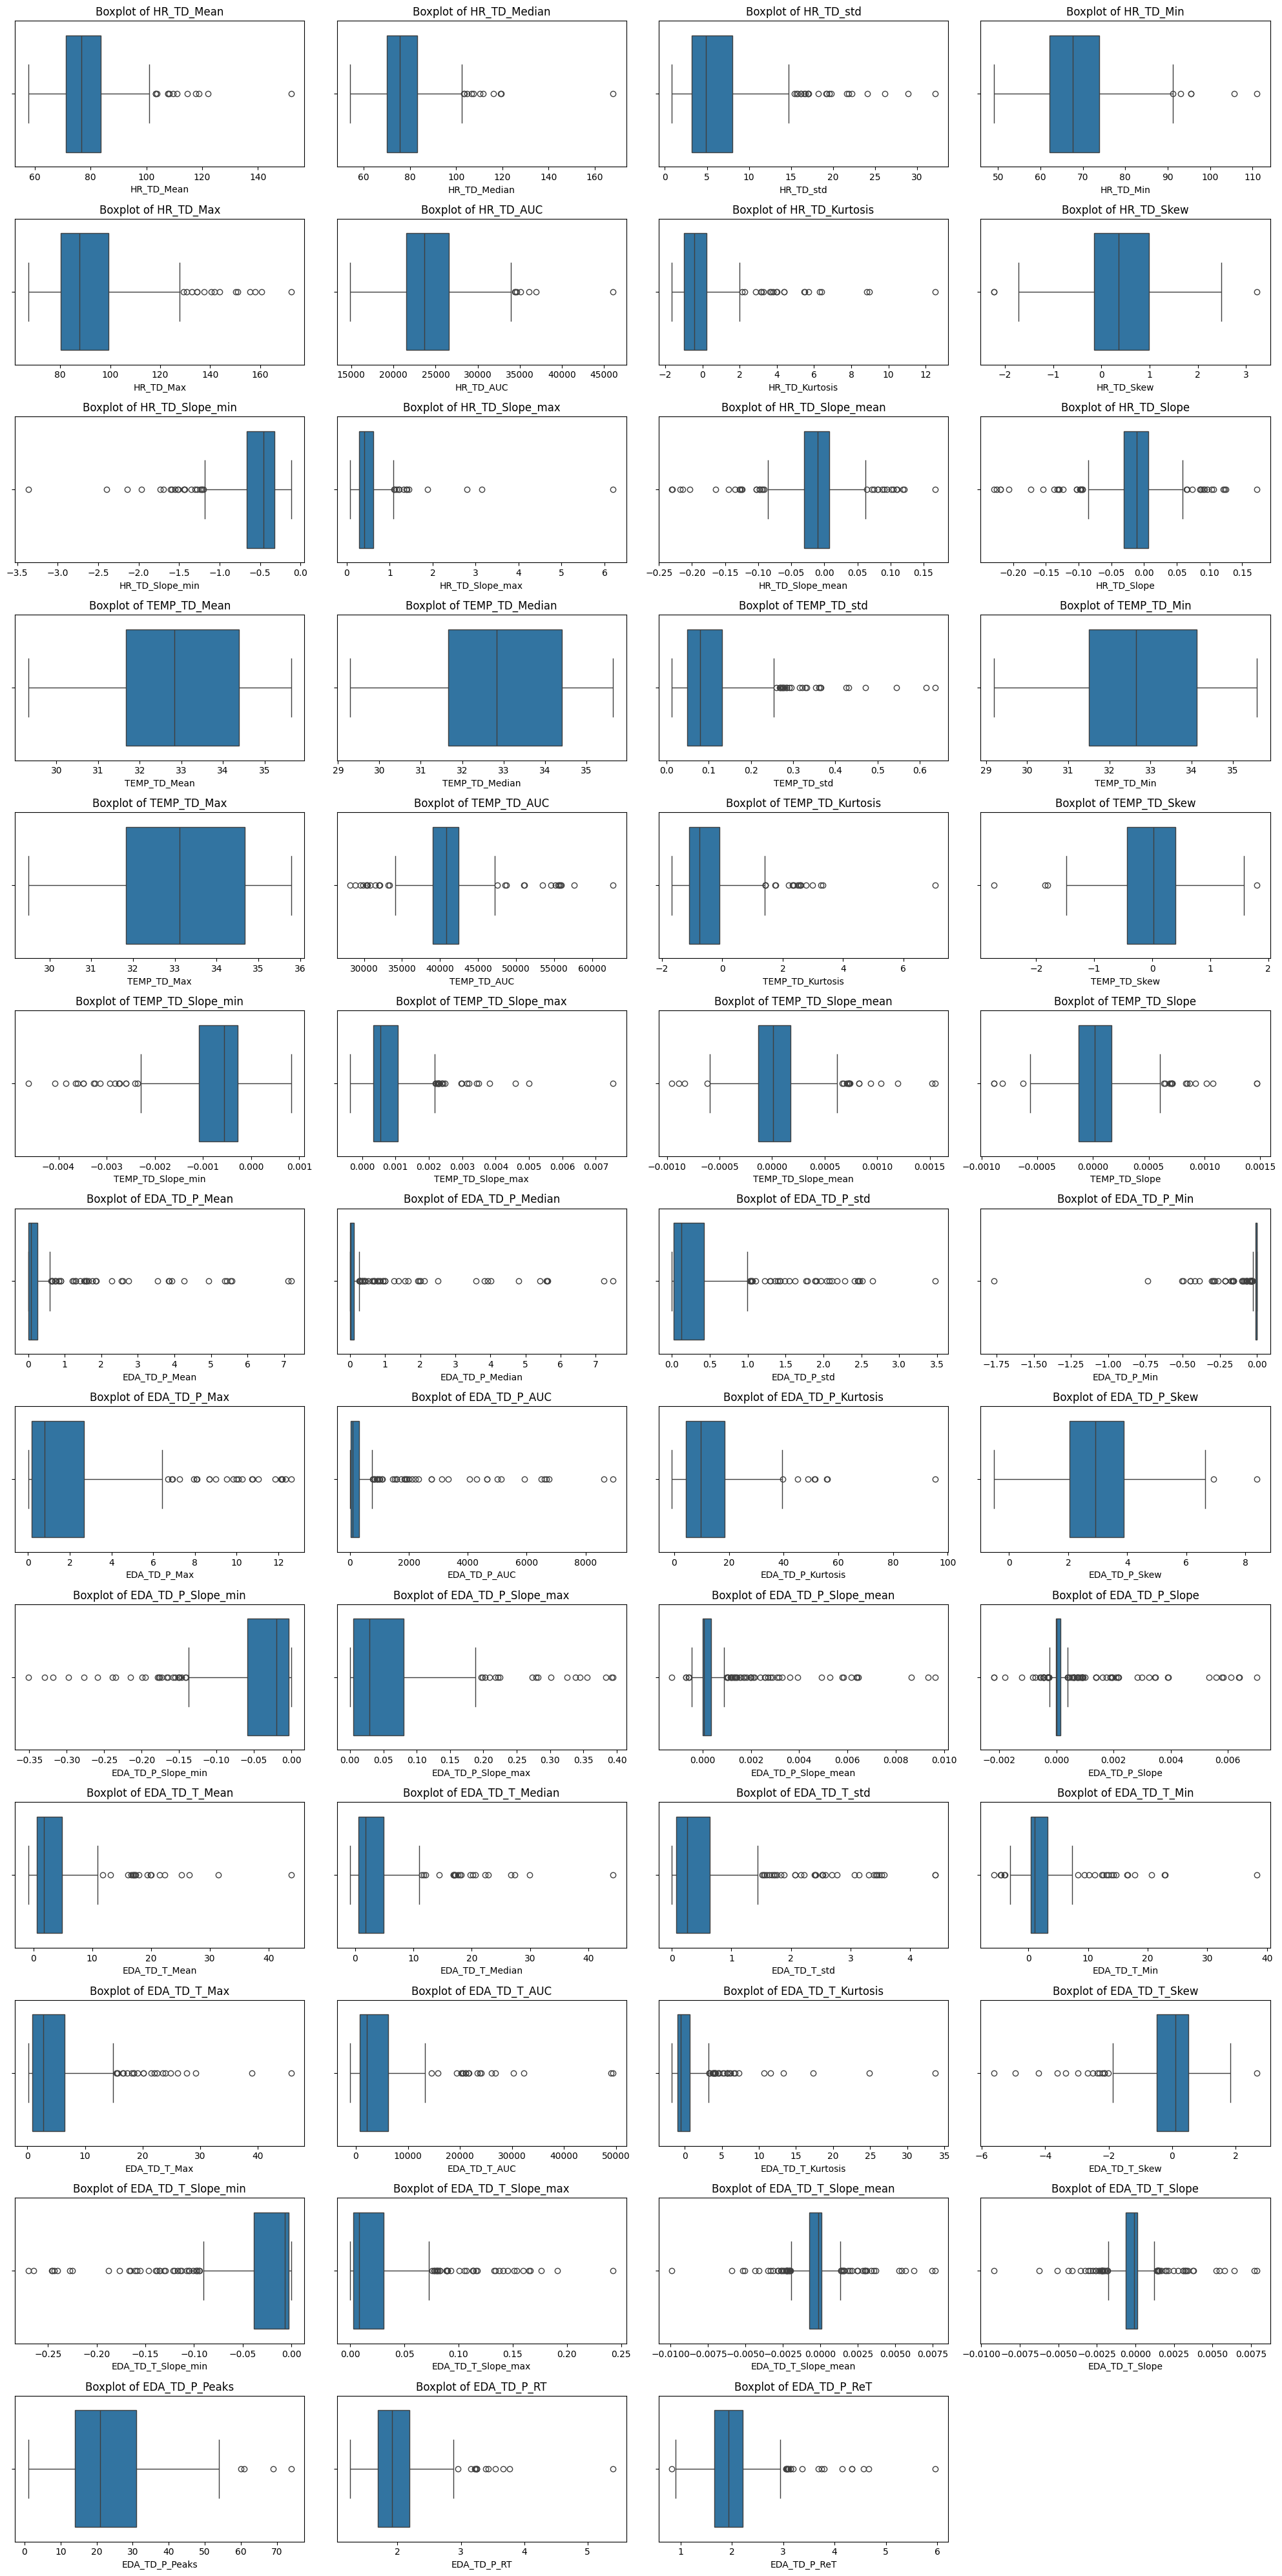

In [80]:
# box plots of numerical features 
plt.figure(figsize=(20, 40))
for i, col in enumerate(numerical_cols):
    plt.subplot(13, 4, i + 1)
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [87]:
# correlation matrix
corr = data.drop(columns=nominal_cols).corr()

# highly correlated variables:
corr = corr.stack().reset_index()
corr.columns = ['var1', 'var2', 'corr']
corr = corr[corr['var1'] < corr['var2']]  # Keep only one direction of the pair
corr = corr[corr['corr'] > 0.7]
print(corr)


                    var1                 var2      corr
1             HR_TD_Mean         HR_TD_Median  0.971109
3             HR_TD_Mean            HR_TD_Min  0.797057
65          HR_TD_Median            HR_TD_Min  0.789881
248            HR_TD_Max           HR_TD_Mean  0.781534
250            HR_TD_Max            HR_TD_std  0.818364
...                  ...                  ...       ...
2579        EDA_TD_T_AUC      EDA_TD_T_Median  0.990674
2581        EDA_TD_T_AUC         EDA_TD_T_Min  0.923344
2582        EDA_TD_T_AUC         EDA_TD_T_Max  0.978750
2828  EDA_TD_T_Slope_max         EDA_TD_T_std  0.860328
2960      EDA_TD_T_Slope  EDA_TD_T_Slope_mean  0.995925

[67 rows x 3 columns]


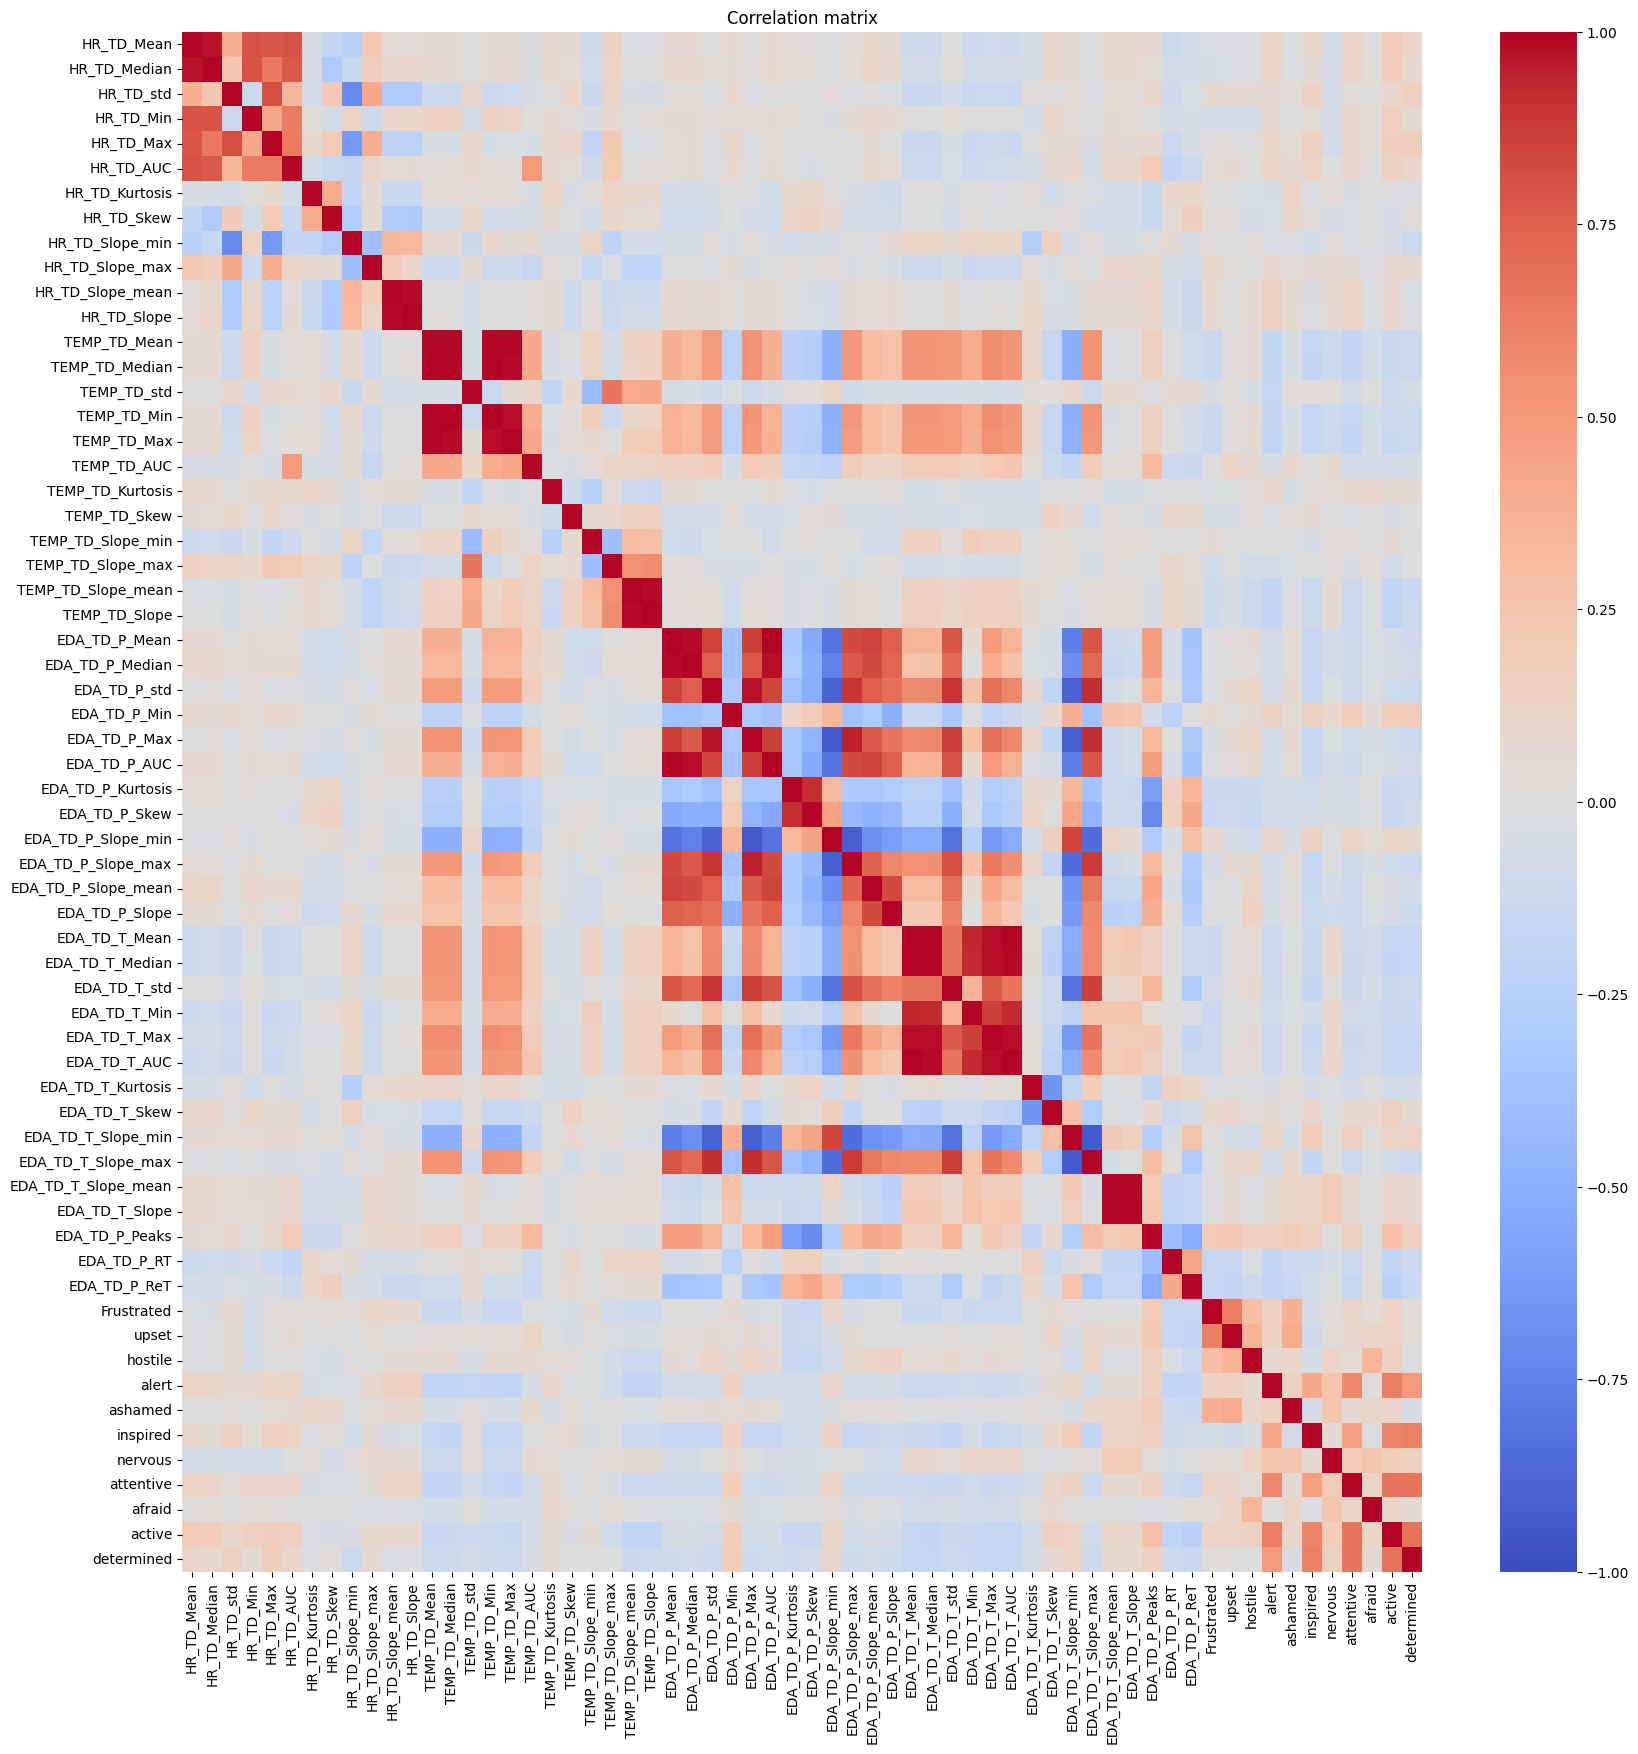

In [81]:
# Correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=nominal_cols).corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()
